In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_parquet(os.path.join("..", "..", "data", "input","clean", "trip_data1.parquet"))

In [4]:
df.dropna(inplace=True)

In [45]:
df["start_hour"]=df["trip_start_timestamp"].dt.hour

In [54]:
trip_data = df.drop(columns=["trip_id", "taxi_id", "company",
                             "trip_start_timestamp", "trip_end_timestamp", 
                             "pickup_census_tract", "pickup_centroid_location", 
                             "dropoff_census_tract", "dropoff_centroid_location"])

## Cluster of Payment Type and Fare

In [7]:
X["payment_type"].unique()

array(['Credit Card', 'Cash', 'Dispute', 'No Charge', 'Unknown', 'Pcard'],
      dtype=object)

In [8]:
payment_type = {
  'Credit Card': 1,
    'Cash':2, 
    'Dispute':3, 
    'No Charge':4,
    'Unknown':5, 
    'Pcard':6
}

In [58]:
trip_data["payment_type"] = trip_data["payment_type"].map(payment_type)

In [60]:
trip_data

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,payment_type,pickup_community_area,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,dropoff_centroid_latitude,dropoff_centroid_longitude,start_hour
668,480.0,3.8,10.65,2.00,0.0,1.0,13.65,1,8.0,41.892042,-87.631864,7.0,41.921877,-87.664078,0
746,1080.0,2.6,12.85,0.00,0.0,0.0,12.85,2,24.0,41.892658,-87.652534,6.0,41.942585,-87.656644,0
748,180.0,0.1,4.25,0.00,0.0,1.5,5.75,2,8.0,41.892073,-87.628874,32.0,41.880994,-87.632746,0
750,780.0,0.9,8.25,0.00,0.0,1.0,9.25,2,8.0,41.907492,-87.635760,8.0,41.907492,-87.635760,0
752,480.0,1.8,7.45,0.00,0.0,0.0,7.45,2,8.0,41.900221,-87.629105,32.0,41.880994,-87.632746,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676076,420.0,1.6,6.85,2.00,0.0,0.0,8.85,1,32.0,41.880994,-87.632746,8.0,41.898332,-87.620763,19
6676078,300.0,1.7,6.45,3.00,0.0,0.0,9.45,1,32.0,41.880994,-87.632746,28.0,41.879067,-87.657005,19
6676080,1320.0,11.4,24.85,6.71,0.0,2.0,33.56,1,56.0,41.785999,-87.750934,24.0,41.892658,-87.652534,19
6676082,1260.0,11.2,24.45,0.00,0.0,2.0,26.45,2,56.0,41.785999,-87.750934,32.0,41.870607,-87.622173,19


In [61]:
trip_data = trip_data.apply(pd.to_numeric)

In [63]:
kmeans=KMeans(n_clusters=4)
# array = X.to_numpy(trip_data)
array = StandardScaler().fit_transform(array)
labels = kmeans_cluster.fit_predict(array)

<ipython-input-64-5f6ec8f2ed37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["labels"] = labels


In [65]:
X

,payment_type,trip_miles,fare,trip_seconds,pickup_centroid_latitude,pickup_centroid_longitude,start_hour,labels
668,1,3.8,10.65,480.0,41.892042,-87.631864,0,3
746,2,2.6,12.85,1080.0,41.892658,-87.652534,0,0
748,2,0.1,4.25,180.0,41.892073,-87.628874,0,0
750,2,0.9,8.25,780.0,41.907492,-87.635760,0,0
752,2,1.8,7.45,480.0,41.900221,-87.629105,0,0
...,...,...,...,...,...,...,...,...
6676076,1,1.6,6.85,420.0,41.880994,-87.632746,19,3
6676078,1,1.7,6.45,300.0,41.880994,-87.632746,19,3
6676080,1,11.4,24.85,1320.0,41.785999,-87.750934,19,3
6676082,2,11.2,24.45,1260.0,41.785999,-87.750934,19,0


## Payment Type and Fare Amont

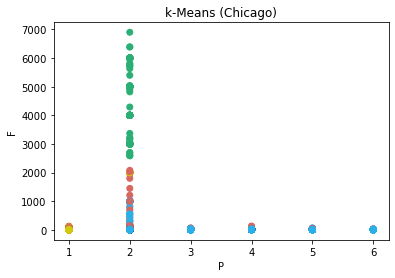

In [66]:
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#D2CA0D", #blue, green, red, yellow
                "#CCCCCC", "#522A64", "#A3DB05", "#FC6514"]

colors = [label_colors[i] for i in labels]
plt.scatter(X["payment_type"], X["fare"], c=colors)
plt.title("k-Means (Chicago)")
plt.xlabel("P")
plt.ylabel("F")

plt.show()

## Payment Type and Start Hour

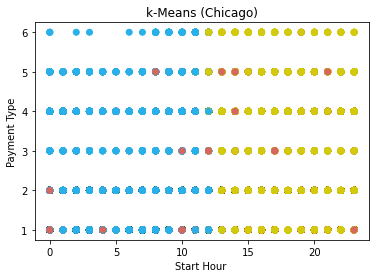

In [52]:
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#D2CA0D", #blue, green, red, yellow
                "#CCCCCC", "#522A64", "#A3DB05", "#FC6514"]

colors = [label_colors[i] for i in labels]
plt.scatter(X["start_hour"], X["payment_type"], c=colors)
plt.title("k-Means (Chicago)")
plt.xlabel("Start Hour ")
plt.ylabel("Payment Type")

plt.show()

## Start Hour/ Demand (K-Means)

In [40]:
df["start_month"] = df["trip_start_timestamp"].dt.month
df["start_day"] = df["trip_start_timestamp"].dt.day
df["start_hour"] = df["trip_start_timestamp"].dt.hour

In [55]:
df_hour_demand=df.groupby(["start_month", "start_day", "start_hour"])["trip_id"].count().reset_index()
df_hour_demand.drop(columns=["start_day", "start_month"], axis=1, inplace=True)

In [56]:
scaler=StandardScaler()

In [57]:
df_hour_demand = scaler.fit_transform(df_hour_demand)
kmeans = KMeans(n_clusters=4, random_state=10).fit(df_hour_demand)

In [58]:
labels = kmeans.predict(df_hour_demand)

In [59]:
df_hour_demand=scaler.inverse_transform(df_hour_demand)

In [18]:
df_hour_demand["labels"] = labels

In [61]:
df_hour_demand_array = pd.DataFrame(df_hour_demand)

In [62]:
df_hour_demand_array

,0,1
0,0.0,2927.0
1,1.0,4528.0
2,2.0,4739.0
3,3.0,3902.0
4,4.0,2345.0
...,...,...
2510,15.0,1671.0
2511,16.0,2022.0
2512,17.0,2195.0
2513,18.0,2507.0


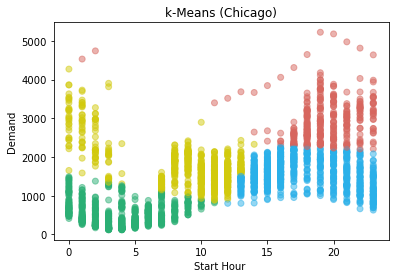

In [63]:
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#D2CA0D", #blue, green, red, yellow
                "#CCCCCC", "#522A64", "#A3DB05", "#FC6514"]


colors = [label_colors[i] for i in labels]
plt.scatter(df_hour_demand_array[0], df_hour_demand_array[1], c=colors, alpha=0.5)
plt.title("k-Means (Chicago)")
plt.xlabel("Start Hour ")
plt.ylabel("Demand")

plt.show()

In [ ]:
# standard scaler 

## Start Hour/ Demand Gaussian Mixture Model

In [20]:
df["start_month"] = df["trip_start_timestamp"].dt.month
df["start_day"] = df["trip_start_timestamp"].dt.day
df["start_hour"] = df["trip_start_timestamp"].dt.hour

In [21]:
df_hour_demand=df.groupby(["start_month", "start_day", "start_hour"])["trip_id"].count().reset_index()
df_hour_demand.drop(columns=["start_day", "start_month"], axis=1, inplace=True)

In [22]:
gmm = GaussianMixture(n_components=4).fit(df_hour_demand)

In [23]:
labels2 = gmm.predict(df_hour_demand)

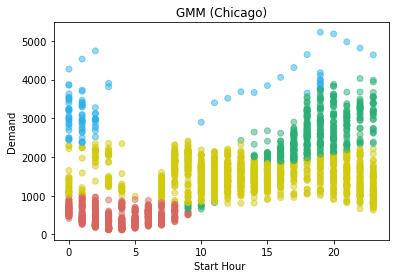

In [26]:
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#D2CA0D", #blue, green, red, yellow
                "#CCCCCC", "#522A64", "#A3DB05", "#FC6514"]

colors = [label_colors[i] for i in labels2]
plt.scatter(df_hour_demand["start_hour"], df_hour_demand["trip_id"], c=colors, alpha=0.5)
plt.title("GMM (Chicago)")
plt.xlabel("Start Hour ")
plt.ylabel("Demand")

plt.show()

## Fare Amount and Payment Type

In [46]:
df_fare_payment = df[["fare","payment_type"]]

In [47]:
df_fare_payment

,fare,payment_type
573,3.45,Cash
574,15.85,Cash
575,6.65,Cash
576,12.85,Cash
577,5.45,Cash
...,...,...
6676082,24.45,Cash
6676083,16.25,Cash
6676084,8.05,Cash
6676085,8.05,Cash


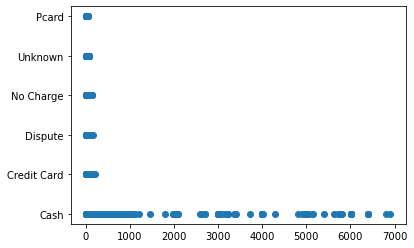

In [12]:
plt.scatter(x=df["fare"],y=df["payment_type"])

In [48]:
payment_type = {
  'Credit Card': 1,
    'Cash':2, 
    'Dispute':3, 
    'No Charge':4,
    'Unknown':5, 
    'Pcard':6
}
df_fare_payment["payment_type"] = df_fare_payment["payment_type"].map(payment_type)

<ipython-input-48-604835c59312>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare_payment["payment_type"] = df_fare_payment["payment_type"].map(payment_type)


In [49]:
kmeans = KMeans(n_clusters=4, random_state=10).fit(df_fare_payment)


In [50]:
labels = kmeans.predict(df_fare_payment)

In [41]:
# df_fare_payment =pd.DataFrame(df_fare_payment)

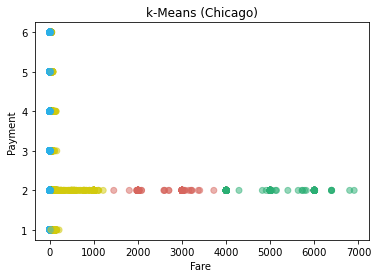

In [53]:
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#D2CA0D", #blue, green, red, yellow
                "#CCCCCC", "#522A64", "#A3DB05", "#FC6514"]

colors = [label_colors[i] for i in labels]
plt.scatter(df_fare_payment["fare"], df_fare_payment["payment_type"], c=colors, alpha=0.5)
plt.title("k-Means (Chicago)")
plt.xlabel("Fare ")
plt.ylabel("Payment")

plt.show()

In [55]:
# analysis -->
# fare and payment types can be clustered in 4 clusters, the high fares are only paid with cash 
#--> We suspect that this is changing in the other years since 2013 is 8 years ago
